**Bigram Model**: Uses one previous character to predict the next character.

**Trigram Model**: Uses two previous characters to predict the next character.

In [1]:
words = open('/content/drive/MyDrive/dataSet_for_practice/names.txt', 'r').read().splitlines()

In [2]:
w = words[:10]
w


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
import torch
import random


# **E01:**
train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [5]:
bigram_counts = torch.zeros((27,27), dtype = torch.int32)
trigram_counts = torch.zeros((27,27,27), dtype = torch.int32)
context_counts = torch.zeros((27,27), dtype = torch.int32)


In [6]:
# Create character vocabulary
chars = sorted(list(set(''.join(words)))) # # Unique characters
stoi = {s:i+1 for i,s in enumerate(chars)} #(string-to-index)is a dictionary that maps each character to a unique integer index.
stoi['.'] = 0 # Reserve index 0 for padding
itos = {i:s for s,i in stoi.items()}# Reverse

In [8]:
# Populate frequency tables
for w in words:
    chs = ['.'] + list(w) + ['.']  # Padding
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        bigram_counts[(ix1, ix2)] += 1
        context_counts[(ix1,)] += 1  # Context for bigram
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix3 = stoi[ch1]
        ix4 = stoi[ch2]
        ix5 = stoi[ch3]
        trigram_counts[(ix3, ix4, ix5)] += 1
        context_counts[(ix3, ix4)] += 1  # Context for trigram

In [9]:
bigram_counts[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [10]:
trigram_counts[0,1,:]

tensor([  0, 207, 190,  31, 366,  55,  21,  17,  91, 154,  27,  75, 632, 384,
        623,  10,  17,   9, 482, 194,  72, 152, 243,   6,  27, 173, 152],
       dtype=torch.int32)

In [11]:
P = (bigram_counts+1).float()
P /= P.sum(1, keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [49]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix >= len(itos):
        #Handle the case when sampling produces the padding character or any character ouside of valid itos range(0-26)
            break # Break out of the while loop if sampling produces a padding character or any invalid characters for itos dict
        out.append(itos[ix])
        if ix == 0:
            break



    print(''.join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [59]:
P1 = (trigram_counts+1).float()
P1 /= P1.sum(2, keepdim=True)
assert P1[0, 0].sum() == 1

In [60]:
P1.shape

torch.Size([27, 27, 27])

In [63]:
g = torch.Generator().manual_seed(2147483647)


for i in range(10):
    ix1 = 0
    ix2 = 0
    out = []
    while True:
        p = P1[ix1, ix2]
        ix1 = ix2
        ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix >= len(itos):
            break
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))

junide.
ilyasid.
prelay.
ocin.
fairritoper.
sathen.
dannaaryanileniassibduinrwin.
lessiyanayla.
te.
farmumthyfortumj.


Calculate loss which is negative log likelihood:

In [68]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        pro = P[ix1,ix2]
        logpro = torch.log(pro)
        log_likelihood += logpro
        n += 1
        #print(f'{ch1}{ch2} : {pro:.4f} , {logpro: .4f}')



print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
bigram_loss = nll/n
print(f'Bigram Model: {bigram_loss}')


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
Bigram Model: 2.4543561935424805


In [69]:
log_likelihood1 = 0.0
n1 = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix3 = stoi[ch1]
        ix4 = stoi[ch2]
        ix5 = stoi[ch3]
        pro1 = P1[ix3, ix4, ix5]
        logpro1 = torch.log(pro1)
        log_likelihood1 += logpro1
        n1 += 1
        #print(f'{ch1}{ch2}{ch3} : {pro1:.4f} , {logpro1: .4f}')



print(f'{log_likelihood1=}')
nll1 = -log_likelihood1
print(f'{nll1=}')
trigram_loss = nll1/n1
print(f'Trigram Model: {trigram_loss}')


log_likelihood1=tensor(-410414.9688)
nll1=tensor(410414.9688)
Trigram Model: 2.092747449874878


In [70]:
# Compare performance
if trigram_loss < bigram_loss:
    print("Trigram model performs better (lower loss).")
else:
    print("Bigram model generalizes better (lower loss).")


Trigram model performs better (lower loss).


NN Approach

In [ ]:
#Create training set of trigrams, packing 1st and 2nd char as inputs and 3rd char as output:

In [71]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    xs.append((stoi[ch1], stoi[ch2]))
    ys.append(stoi[ch3])
    print(f'{ch1}[{stoi[ch2]}], {ch2}[{stoi[ch2]}], {ch3}[{stoi[ch3]}]')


xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

.[5], e[5], m[13]
e[13], m[13], m[13]
m[13], m[13], a[1]
m[1], a[1], .[0]
number of examples:  8


In [73]:
xenc = F.one_hot(xs, num_classes=27)
print(xenc), xenc.shape

tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]]])


(None, torch.Size([4, 2, 27]))

In [74]:
xs.shape, ys.shape

(torch.Size([4, 2]), torch.Size([4]))

In [75]:
xenc = xenc.reshape(4, -1).float()
xenc.shape

torch.Size([4, 54])

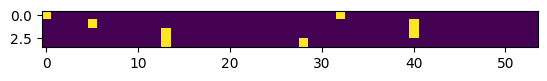

In [76]:
plt.imshow(xenc)

In [77]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad=True)

In [78]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(4), ys].log().mean()
loss.item()

4.095324993133545

In [79]:
W.grad = None
loss.backward()

In [80]:
#Let's put everything together:

In [81]:
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    xs.append((stoi[ch1], stoi[ch2]))
    ys.append(stoi[ch3])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad=True)

In [82]:
for k in range(100):
  xenc = F.one_hot(xs, num_classes=27)
  xenc = xenc.reshape(len(xenc), -1).float()

  logits = xenc @ W
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(len(xenc)), ys].log().mean()

  print(loss.item())

  W.grad = None
  loss.backward()

  W.data += -50 * W.grad

4.186270713806152
3.3573689460754395
3.042151689529419
2.871455430984497
2.7671945095062256
2.694681406021118
2.6390926837921143
2.5949814319610596
2.5590028762817383
2.529222011566162
2.5042338371276855
2.483072280883789
2.464961051940918
2.4493141174316406
2.435654401779175
2.423619031906128
2.412919759750366
2.4033381938934326
2.394700288772583
2.386871099472046
2.379739999771118
2.3732175827026367
2.3672287464141846
2.3617119789123535
2.3566133975982666
2.3518879413604736
2.34749698638916
2.343406915664673
2.3395884037017822
2.3360161781311035
2.332667350769043
2.3295230865478516
2.3265652656555176
2.3237786293029785
2.3211495876312256
2.3186655044555664
2.3163154125213623
2.314089059829712
2.3119773864746094
2.3099722862243652
2.3080661296844482
2.3062520027160645
2.3045237064361572
2.302875518798828
2.301302194595337
2.2997987270355225
2.29836106300354
2.2969844341278076
2.2956652641296387
2.294400930404663
2.293187141418457
2.2920210361480713
2.290900468826294
2.2898223400115967

Seems like loss is a bit lower than

bigram but not as low as count method 🤔

**Sampling from net:**

In [83]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

  out = []
  ix1, ix2 = 0, 0
  while True:
    xenc = F.one_hot(torch.tensor([ix1, ix2]), num_classes=27).float()
    xenc = xenc.reshape((1, -1))
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)

    ix1 = ix2
    ix2 = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

aunide.
aliasad.
ushfay.
ainn.
aui.
ritoleras.
get.
adannaauranileniassibdainrwi.
ol.
seisiely.


# **E02:**
 split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [20]:
"""
Dev Set (10%)
words[int(0.8 * n):int(0.9 * n)]
Starts after 80% (from index 0.8 * n)
Ends at 90% (up to index 0.9 * n)
This results in 10% of the dataset

test Set (10%)
words[int(0.9 * n):]
Starts after 90% (from index 0.9 * n)
Ends at the last index of words, which includes the final 10% of data
"""

'\nDev Set (10%)\nwords[int(0.8 * n):int(0.9 * n)]\nStarts after 80% (from index 0.8 * n)\nEnds at 90% (up to index 0.9 * n)\nThis results in 10% of the dataset\n\ntest Set (10%)\nwords[int(0.9 * n):]\nStarts after 90% (from index 0.9 * n)\nEnds at the last index of words, which includes the final 10% of data\n'

In [84]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [107]:
#build the data set
block_size = 3 # context length: how many characters do we take to predict the next one?

def create_dataset(word, ngram=2):
  xs, ys = [], []
  for w in word:
    chs = ['.'] + list(w) + ['.']  # Add start & end tokens
    for i in range(len(chs) - (ngram - 1)):
      context = chs[i:i + ngram]  # Extract n-gram context
      ix1 = [stoi[ch] for ch in context[:-1]]  # Input indices
      ix2 = stoi[context[-1]]  # Target index
      xs.append(ix1 if ngram > 2 else ix1[0])  # Flatten for bigram
      ys.append(ix2)

  xs = torch.tensor(xs)
  ys = torch.tensor(ys)
  print(xs.shape, ys.shape)
  return torch.tensor(xs), torch.tensor(ys)


import random
# Split dataset into 80% train, 10% dev, 10% test
random.seed(42)
random.shuffle(words)  # Shuffle the dataset
n = len(words)
train_words = words[:int(0.8 * n)]
dev_words = words[int(0.8 * n):int(0.9 * n)]
test_words = words[int(0.9 * n):]


# Create datasets
xs_train, ys_train = create_dataset(train_words, ngram=2)  # Bigram training set
xs_dev, ys_dev = create_dataset(dev_words, ngram=2)  # Dev set
xs_test, ys_test = create_dataset(test_words, ngram=2)  # Test set

xs_train_tri, ys_train_tri = create_dataset(train_words, ngram=3)  # Trigram training set
xs_dev_tri, ys_dev_tri = create_dataset(dev_words, ngram=3)  # Dev set
xs_test_tri, ys_test_tri = create_dataset(test_words, ngram=3)  # Test set

print(f"Train set size: {len(xs_train)} examples")
print(f"Dev set size: {len(xs_dev)} examples")
print(f"Test set size: {len(xs_test)} examples")



torch.Size([182580]) torch.Size([182580])
torch.Size([22767]) torch.Size([22767])
torch.Size([22799]) torch.Size([22799])


<ipython-input-107-1790f5a3b243>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(xs), torch.tensor(ys)


torch.Size([156954, 2]) torch.Size([156954])
torch.Size([19564, 2]) torch.Size([19564])
torch.Size([19595, 2]) torch.Size([19595])
Train set size: 182580 examples
Dev set size: 22767 examples
Test set size: 22799 examples


In [221]:
# Initialize network
g = torch.Generator().manual_seed(2147483647)
W_bigram = torch.randn((27, 27), generator=g, requires_grad=True)
W_trigram = torch.randn((27, 27, 27), generator=g, requires_grad=True)  # 3D for trigram

In [222]:
W_trigram.shape

torch.Size([27, 27, 27])

In [237]:
def train_ngram(xs, ys, W, ngram, epochs=10, lr=50):
    for k in range(epochs):
        if ngram == 2:
            xenc = F.one_hot(xs, num_classes=27).float()
            logits = (xenc @ W).squeeze()
        elif ngram == 3:
          xs = xs.reshape(-1, 2)
          ix1, ix2 = xs[:, 0], xs[:, 1]
          xenc = F.one_hot(torch.stack([ix1, ix2], dim=-1), num_classes=27).float()
          xenc = xenc.reshape((xenc.shape[0], -1))
          logits = xenc @ W


        else:
          raise ValueError("Only supports bigram (ngram=2) or trigram (ngram=3)")

        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)  # Convert to probabilities
        loss = -probs[torch.arange(xs.shape[0]), ys].log().mean() + 0.01 * (W**2).mean()
        print(f"Epoch {k+1}, Loss: {loss.item()}")

        W.grad = None
        loss.backward()
        W.data += -lr * W.grad  # Update weights
    return W




In [235]:
# Train Bigram Model
print("\nTraining Bigram Model:")
W_bigram = train_ngram(xs_train, ys_train, W_bigram,ngram=2)


Training Bigram Model:
Epoch 1, Loss: 2.521151304244995
Epoch 2, Loss: 2.5197243690490723
Epoch 3, Loss: 2.5183732509613037
Epoch 4, Loss: 2.5170929431915283
Epoch 5, Loss: 2.5158777236938477
Epoch 6, Loss: 2.514724016189575
Epoch 7, Loss: 2.51362681388855
Epoch 8, Loss: 2.5125832557678223
Epoch 9, Loss: 2.5115888118743896
Epoch 10, Loss: 2.510641098022461


In [ ]:
# Train Trigram Model
print("\nTraining Trigram Model:")
W_trigram = train_ngram(xs_train_tri, ys_train_tri, W_trigram, ngram=3)

In [190]:
# Evaluate Function
def evaluate(xs, ys, W):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W).squeeze()
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(xs.nelement()), ys].log().mean().item()
    return loss

In [160]:
# Evaluate on dev and test splits
print("\nEvaluating Bigram Model:")
dev_loss_bigram = evaluate(xs_dev, ys_dev, W_bigram)
test_loss_bigram = evaluate(xs_test, ys_test, W_bigram)
print(f"Bigram Dev Loss: {dev_loss_bigram}")
print(f"Bigram Test Loss: {test_loss_bigram}")


Evaluating Bigram Model:
Bigram Dev Loss: 2.688514471054077
Bigram Test Loss: 2.6892077922821045


In [ ]:
print("\nEvaluating Trigram Model:")
dev_loss_trigram = evaluate(xs_dev_tri, ys_dev_tri, W_trigram)
test_loss_trigram = evaluate(xs_test_tri, ys_test_tri, W_trigram)
print(f"Trigram Dev Loss: {dev_loss_trigram}")
print(f"Trigram Test Loss: {test_loss_trigram}")

# **E03:**
 use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?